In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd

# Download 10 stock data
START_DATE = "2023-08-30"
END_DATE = "2025-08-30"

stocks = [
    'HDFCBANK.NS',  # HDFC Bank Ltd.
    'ITC.NS',       # ITC Ltd.      
    'TCS.NS',       # Tata Consultancy Services
    'RELIANCE.NS',  # Reliance Industries Ltd.
    'COALINDIA.NS', # Coal India Ltd.
    'INFY.NS',      # Infosys Ltd.
    'BAJFINANCE.NS',# Bajaj Finance Ltd.
    'ASIANPAINT.NS',# Asian Paints Ltd.
    'LT.NS',        # Larsen & Toubro Ltd.
    'BEL.NS'        # Bharat Electronics Ltd.
]


raw_data = yf.download(stocks, start = START_DATE, end = END_DATE)

data = raw_data['Close']

[*********************100%***********************]  10 of 10 completed


In [3]:
data.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,3222.139160,719.722351,132.162613,197.842972,770.242737,1362.069092,414.485626,2663.034668,1200.142212,3285.771484
2023-08-31,3184.389160,709.314819,130.836563,198.967316,766.705505,1362.353638,411.583862,2656.841553,1194.657715,3252.680664
2023-09-01,3187.763184,724.921143,135.404068,204.891769,768.291199,1370.326050,412.847534,2656.251709,1197.461914,3274.385498
2023-09-04,3164.291992,719.935303,138.056168,214.319077,773.097046,1390.493774,409.524536,2665.099121,1196.494141,3312.466797
2023-09-05,3152.311523,727.347290,137.221222,220.848969,768.388794,1403.591187,414.766449,2686.578125,1202.896851,3322.980713


In [4]:
data.count()

Ticker
ASIANPAINT.NS    494
BAJFINANCE.NS    494
BEL.NS           494
COALINDIA.NS     494
HDFCBANK.NS      494
INFY.NS          494
ITC.NS           494
LT.NS            494
RELIANCE.NS      494
TCS.NS           494
dtype: int64

In [5]:
data.isnull().values.any()

np.False_

In [6]:
estimation_data = data.iloc[:248] # using half of the data for estimating mu and sigma^2

estimation_data.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,3222.139160,719.722351,132.162613,197.842972,770.242737,1362.069092,414.485626,2663.034668,1200.142212,3285.771484
2023-08-31,3184.389160,709.314819,130.836563,198.967316,766.705505,1362.353638,411.583862,2656.841553,1194.657715,3252.680664
2023-09-01,3187.763184,724.921143,135.404068,204.891769,768.291199,1370.326050,412.847534,2656.251709,1197.461914,3274.385498
2023-09-04,3164.291992,719.935303,138.056168,214.319077,773.097046,1390.493774,409.524536,2665.099121,1196.494141,3312.466797
2023-09-05,3152.311523,727.347290,137.221222,220.848969,768.388794,1403.591187,414.766449,2686.578125,1202.896851,3322.980713


In [7]:
estimation_data.shift(1).head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-31,3222.139160,719.722351,132.162613,197.842972,770.242737,1362.069092,414.485626,2663.034668,1200.142212,3285.771484
2023-09-01,3184.389160,709.314819,130.836563,198.967316,766.705505,1362.353638,411.583862,2656.841553,1194.657715,3252.680664
2023-09-04,3187.763184,724.921143,135.404068,204.891769,768.291199,1370.326050,412.847534,2656.251709,1197.461914,3274.385498
2023-09-05,3164.291992,719.935303,138.056168,214.319077,773.097046,1390.493774,409.524536,2665.099121,1196.494141,3312.466797


In [8]:
returns = estimation_data - estimation_data.shift(1)

In [9]:
returns.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-31,-37.750000,-10.407532,-1.326050,1.124344,-3.537231,0.284546,-2.901764,-6.193115,-5.484497,-33.090820
2023-09-01,3.374023,15.606323,4.567505,5.924454,1.585693,7.972412,1.263672,-0.589844,2.804199,21.704834
2023-09-04,-23.471191,-4.985840,2.652100,9.427307,4.805847,20.167725,-3.322998,8.847412,-0.967773,38.081299
2023-09-05,-11.980469,7.411987,-0.834946,6.529892,-4.708252,13.097412,5.241913,21.479004,6.402710,10.513916


In [10]:
returns = returns.dropna()

returns.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-31,-37.750000,-10.407532,-1.326050,1.124344,-3.537231,0.284546,-2.901764,-6.193115,-5.484497,-33.090820
2023-09-01,3.374023,15.606323,4.567505,5.924454,1.585693,7.972412,1.263672,-0.589844,2.804199,21.704834
2023-09-04,-23.471191,-4.985840,2.652100,9.427307,4.805847,20.167725,-3.322998,8.847412,-0.967773,38.081299
2023-09-05,-11.980469,7.411987,-0.834946,6.529892,-4.708252,13.097412,5.241913,21.479004,6.402710,10.513916
2023-09-06,1.955811,4.228394,-1.375137,0.389191,10.050659,-1.376221,4.071869,-2.457520,2.531250,0.532715


In [11]:
import numpy as np

mu = [] # expected returns

for stock in stocks:
    mean = np.mean(returns[stock])
    mu.append(mean)

In [12]:
mu = np.array(mu)

In [13]:
mu

array([ 0.16892629,  0.30355365,  4.52525225,  1.24851391,  1.0833815 ,
        2.07435021,  0.02727975, -0.10328631,  3.86247568,  0.66580033])

In [14]:
mu.shape

(10,)

In [15]:
V = np.cov(returns, rowvar=False) # covariance matrix

In [16]:
V

array([[1175.19338235,  112.74155272,   28.01695998,   54.21646312,
          97.45036078,   95.86438675,   46.09275368,  448.42452045,
         154.38328774,  336.11954433],
       [ 112.74155272,  123.79680372,   22.34866707,   27.94305219,
          35.50746297,   49.26458501,   15.80075052,  266.17824509,
          82.05349355,   92.83162837],
       [  28.01695998,   22.34866707,   38.49595583,   35.75128014,
          20.22065626,   16.34532992,    4.75649559,  234.04831708,
          58.54555953,   12.66928211],
       [  54.21646312,   27.94305219,   35.75128014,   76.81676425,
          22.9656176 ,   25.74052748,    9.25627281,  275.20215275,
          84.45062621,   49.32911065],
       [  97.45036078,   35.50746297,   20.22065626,   22.9656176 ,
         110.62293691,   35.14191614,    6.48490913,  202.94215761,
          57.86388925,   39.30457305],
       [  95.86438675,   49.26458501,   16.34532992,   25.74052748,
          35.14191614,  440.2444679 ,   21.1725022 ,  312

In [17]:
V.shape

(10, 10)

In [18]:
inv_V = np.linalg.inv(V)

In [19]:
inv_V

array([[ 1.04945907e-03, -4.88524703e-04,  5.20538399e-04,
        -2.04976165e-04, -6.45817606e-04,  2.01611388e-04,
        -1.34832234e-03, -3.11366845e-05, -1.02307757e-04,
        -1.37446288e-04],
       [-4.88524703e-04,  1.12489080e-02, -1.03321575e-03,
         3.75989671e-04, -1.40249582e-03, -5.17154748e-04,
        -3.80897940e-03, -3.89253202e-04, -1.13267243e-03,
         7.64238341e-05],
       [ 5.20538399e-04, -1.03321575e-03,  6.11661413e-02,
        -1.75862713e-02, -2.39704835e-03, -1.16813708e-03,
         9.93566058e-04, -2.34829850e-03, -2.06019144e-03,
         1.23587784e-03],
       [-2.04976165e-04,  3.75989671e-04, -1.75862713e-02,
         2.55194853e-02,  7.79890744e-05,  1.12288721e-04,
        -3.13684356e-03, -3.74823267e-04, -2.34749666e-03,
        -1.06063455e-04],
       [-6.45817606e-04, -1.40249582e-03, -2.39704835e-03,
         7.79890744e-05,  1.12781304e-02, -8.58839147e-04,
         8.02214844e-04, -2.13181295e-04, -5.65818451e-04,
         3.

In [20]:
inv_V.shape

(10, 10)

In [21]:
ones = np.ones(10)

In [22]:
ones.shape

(10,)

In [23]:
# Estimating optimal mean and variance

A = mu.T @ inv_V @ mu
B = mu.T @ inv_V @ ones
C = ones.T @ inv_V @ones

In [24]:
print(f"A: {A}\nB: {B}\nC: {C}")

A: 1.0595740681189214
B: 0.1687615873404549
C: 0.08275999454645533


In [25]:
D = A*C - B**2
print(f"D: {D}")

D: 0.05920987073741743


In [ ]:
# Plot Mean-Variance and Mean-Std.Dev Frontier (Parabolic, Hyperbolic)

import matplotlib.pyplot as plt

y = np.linspace(-3.5, 7.5, 400) # (B/C) is the return corresponding to minimum variance w_mvp

x_var = (C/D) * (y - B/C)**2 + (1/C)
x_std = np.sqrt(x_var)

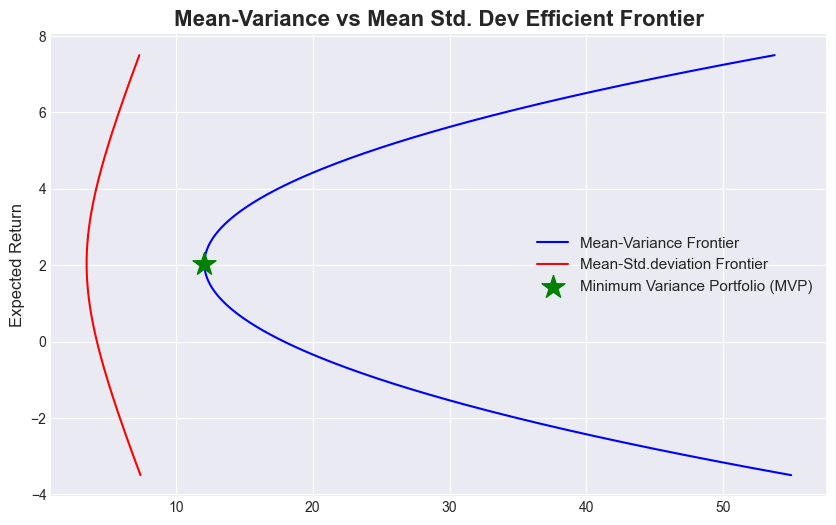

In [75]:
plt.figure(figsize=(10, 6))

plt.plot(x_var, y, 'b-', label='Mean-Variance Frontier')
plt.plot(x_std, y, 'r-', label='Mean-Std.deviation Frontier')

# Mark the Minimum Variance Portfolio
plt.scatter((1/C), (B/C), marker='*', color='green', s=300, zorder=100, label='Minimum Variance Portfolio (MVP)')

# Add labels and title
plt.title('Mean-Variance vs Mean Std. Dev Efficient Frontier', fontsize=16, fontweight='bold')
plt.ylabel('Expected Return', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

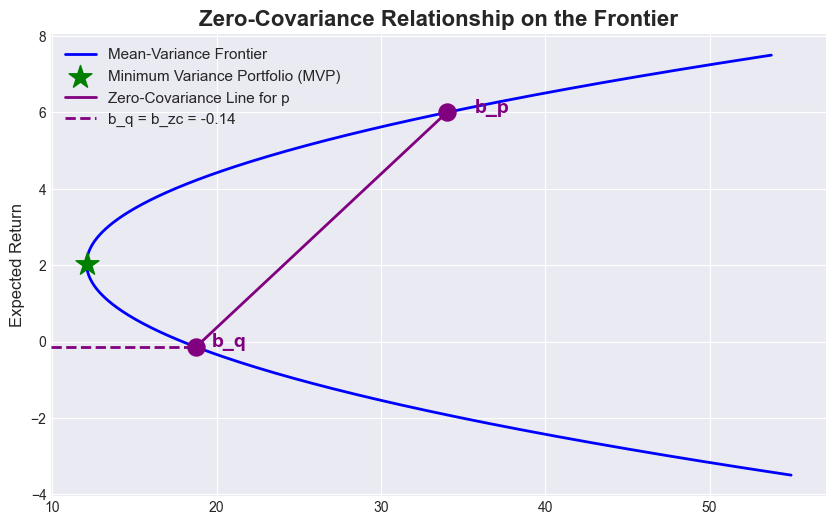

In [ ]:
# Plot zero covariance Relationship on Mean - Variance frontier
b_p = 6
var_p = (C / D) * (b_p - B / C)**2 + (1 / C)

y_zc = (B / C) - D / (C**2 * (b_p - B / C))
var_zc = (C / D) * (y_zc - B / C)**2 + (1 / C)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_var, y, 'b-', linewidth=2, label='Mean-Variance Frontier')
ax.scatter((1/C), (B/C), marker='*', color='green', s=300, zorder=100, label='Minimum Variance Portfolio (MVP)')

ax.scatter([var_p, var_zc], [b_p, y_zc], marker='o', color='purple', s=150, zorder=5)
ax.text(var_p * 1.05, b_p, 'b_p', fontsize=14, fontweight='bold', color='purple')
ax.text(var_zc * 1.05, y_zc, 'b_q', fontsize=14, fontweight='bold', color='purple')

ax.plot([var_p, var_zc], [b_p, y_zc], color='purple', linestyle='-', linewidth=2, label='Zero-Covariance Line for p')

ax.axhline(y=y_zc, xmin=0, xmax=var_zc / plt.xlim()[1] - 0.15, color='purple', linestyle='--', linewidth = 2, label=f'b_q = b_zc = {y_zc:.2f}')

ax.set_title('Zero-Covariance Relationship on the Frontier', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
plt.ylabel('Expected Return', fontsize=12)
ax.grid(True)

plt.show()